<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

pd.options.mode.chained_assignment = None

import warnings

warnings.filterwarnings('ignore')

In [2]:
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

In [3]:
display(df_full.head())
display(df_train.head())
display(df_test.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [4]:
print(df_full.info())
print()
print(df_train.info())
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Общее количество строк в исходной выборке - 19439. Колонок - 87. Типы данных соответствуют.

В обучающей выборке 14149 строк, колонок также 87. Типы данных соответствуют.

В тестовой выборке 5290 строк и 53 колонки. Типы данных соответствуют.

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery.

In [5]:
rougher_output_recovery = []

for i in range(len(df_train)):
    ror = ((df_train['rougher.output.concentrate_au'][i] * (df_train['rougher.input.feed_au'][i] - 
                                                         df_train['rougher.output.tail_au'][i])) / 
           (df_train['rougher.input.feed_au'][i] * (df_train['rougher.output.concentrate_au'][i] - 
                                             df_train['rougher.output.tail_au'][i]))) * 100
    
    rougher_output_recovery.append(ror)

my_ror = pd.Series(rougher_output_recovery)
ror = df_train['rougher.output.recovery']

In [6]:
# найдем MAE между нашими расчётами и значением признака
print('Среднее абсолютное отклонение между нашими расчётами и значением признака:', 
      mean_absolute_error(ror, my_ror))

Среднее абсолютное отклонение между нашими расчётами и значением признака: 9.73512347450521e-15


Отклонения между нашим рассчетом и данными в датафрейме почти нет. Значит в предоставленных данных всё рассчитано верно.

Проанализируем признаки, недоступные в тестовой выборке. Их должно быть 34. 

In [7]:
full_columns = df_full.columns.values.tolist()
test_columns = df_test.columns.values.tolist()
not_in_test = list(set(full_columns) ^ set(test_columns))
print(len(not_in_test))
print()
print(pd.Series(not_in_test).sort_values())

34

6                           final.output.concentrate_ag
32                          final.output.concentrate_au
7                           final.output.concentrate_pb
27                         final.output.concentrate_sol
22                                final.output.recovery
3                                  final.output.tail_ag
4                                  final.output.tail_au
13                                 final.output.tail_pb
2                                 final.output.tail_sol
0                 primary_cleaner.output.concentrate_ag
23                primary_cleaner.output.concentrate_au
14                primary_cleaner.output.concentrate_pb
10               primary_cleaner.output.concentrate_sol
28                       primary_cleaner.output.tail_ag
20                       primary_cleaner.output.tail_au
15                       primary_cleaner.output.tail_pb
25                      primary_cleaner.output.tail_sol
33                      rougher.calculation.

В тестовой выборке нет целевых признаков и колонок - эффективности обогащения чернового и финального концентрата, также нет колонок, необходимых для их рассчета - final.output и rougher.output. Также нет данных по концентратам и хвостам после первой очистки, нет данных по хвостам после второй чистки. То есть нет **параметров продукта** для каждой стадии процесса. 

Еще здесь нет **расчетных характеристик** для флотационной установки с реагентом сульфид натрия.

Добавим столбцы с целевыми признаками в тестовую выборку из исходных данных.

In [8]:
df_full.set_index('date')
df_train.set_index('date')
df_test.set_index('date')
df_test = df_test.merge(df_full[['rougher.output.recovery', 'final.output.recovery', 'date']],
                         how = 'inner', on= 'date')
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


Далее проведем стандартную предобработку - проверим на дубликаты, проработаем пропуски. Проверять будем сначала исходные данные.

In [9]:
print('Количество явных дубликатов:', df_full.duplicated().sum())
print('Дубликаты столбца date:', df_full['date'].value_counts().head())

Количество явных дубликатов: 0
Дубликаты столбца date: 2017-09-07 23:59:59    1
2018-04-05 20:59:59    1
2018-04-12 16:59:59    1
2016-11-12 20:59:59    1
2016-10-21 18:59:59    1
Name: date, dtype: int64


Дубликатов в исходных данных нет, значит и в выборках их тоже нет.

In [10]:
# посмотрим пропуски в исходных данных и выборках
pd.DataFrame(round(df_full.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
date,0.000000
final.output.concentrate_ag,0.000000
final.output.concentrate_pb,0.000000
final.output.concentrate_sol,1.100000
final.output.concentrate_au,0.000000
final.output.recovery,0.000000
final.output.tail_ag,0.000000
final.output.tail_pb,0.500000
final.output.tail_sol,0.000000
final.output.tail_au,0.000000


In [11]:
pd.DataFrame(round(df_train.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
date,0.000000
final.output.concentrate_ag,0.000000
final.output.concentrate_pb,0.000000
final.output.concentrate_sol,1.500000
final.output.concentrate_au,0.000000
final.output.recovery,0.000000
final.output.tail_ag,0.000000
final.output.tail_pb,0.700000
final.output.tail_sol,0.000000
final.output.tail_au,0.000000


In [12]:
pd.DataFrame(round(df_test.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
date,0.000000
primary_cleaner.input.sulfate,0.100000
primary_cleaner.input.depressant,0.100000
primary_cleaner.input.feed_size,0.000000
primary_cleaner.input.xanthate,0.100000
primary_cleaner.state.floatbank8_a_air,0.000000
primary_cleaner.state.floatbank8_a_level,0.000000
primary_cleaner.state.floatbank8_b_air,0.000000
primary_cleaner.state.floatbank8_b_level,0.000000
primary_cleaner.state.floatbank8_c_air,0.000000


Самое большое кол-во пропусков в столбце secondary_cleaner.output.tail_sol - 9% и 11% в исходных данных и тренировочной выборке. Это параметр продукта отвальные хвосты - содержание коллоидного раствора после второй чистки. Остальные пропуски незначительны. В тестовой выборке этого столбца нет. И значительных пропусков тоже нет - все меньше процента.

Так как в условии обозначили, что соседние по времени параметры похожи, то все пропуски заполним значениями из предыдущих строк.

In [13]:
df_full = df_full.fillna(method='ffill')
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')

print(df_full.info())
print()
print(df_train.info())
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19439 non-null  float64
 2   final.output.concentrate_pb                         19439 non-null  float64
 3   final.output.concentrate_sol                        19439 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19439 non-null  float64
 7   final.output.tail_pb                                19439 non-null  float64
 8   final.output.tail_sol                               19439 non-null  float64


## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

Построим гистограммы.

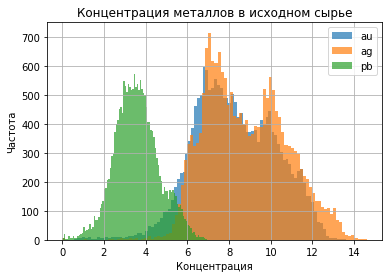

In [14]:
df_full['rougher.input.feed_au'].hist(bins=100, alpha = 0.7, label='au')
df_full['rougher.input.feed_ag'].hist(bins=100, alpha = 0.7, label='ag')
df_full['rougher.input.feed_pb'].hist(bins=100, alpha = 0.7, label='pb')


plt.title('Концентрация металлов в исходном сырье')
plt.xlabel('Концентрация')
plt.ylabel('Частота')

plt.legend()
plt.show()

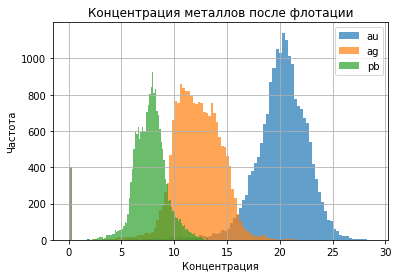

In [15]:
df_full['rougher.output.concentrate_au'].hist(bins=100, alpha = 0.7, label='au')
df_full['rougher.output.concentrate_ag'].hist(bins=100, alpha = 0.7, label='ag')
df_full['rougher.output.concentrate_pb'].hist(bins=100, alpha = 0.7, label='pb')


plt.title('Концентрация металлов после флотации')
plt.xlabel('Концентрация')
plt.ylabel('Частота')

plt.legend()
plt.show()

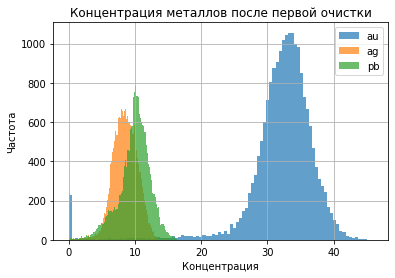

In [16]:
df_full['primary_cleaner.output.concentrate_au'].hist(bins=100, alpha = 0.7, label='au')
df_full['primary_cleaner.output.concentrate_ag'].hist(bins=100, alpha = 0.7, label='ag')
df_full['primary_cleaner.output.concentrate_pb'].hist(bins=100, alpha = 0.7, label='pb')


plt.title('Концентрация металлов после первой очистки')
plt.xlabel('Концентрация')
plt.ylabel('Частота')

plt.legend()
plt.show()

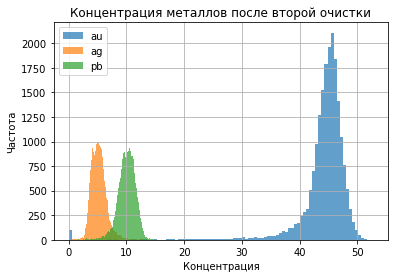

In [17]:
df_full['final.output.concentrate_au'].hist(bins=100, alpha = 0.7, label='au')
df_full['final.output.concentrate_ag'].hist(bins=100, alpha = 0.7, label='ag')
df_full['final.output.concentrate_pb'].hist(bins=100, alpha = 0.7, label='pb')


plt.title('Концентрация металлов после второй очистки')
plt.xlabel('Концентрация')
plt.ylabel('Частота')

plt.legend()
plt.show()

Изучив графики, можно сказать, что самая маленькая концентрация металлов в исходном сырье. А ещё в исходном сырье одинаковое содержание серебра и золота. После флотации - чуть больше золота, поменьше серебра и ещё меньше свинца. И частота выявления таких концентраций у них примерно на одном уровне. 

Далее после первой очистки концентрации золота по-прежнему больше, она увеличилась. Концентрация серебра уменьшилась, а свинца увеличилась. Частота фиксирования таких концентраций всех трех металлов осталась примерно на том же уровне.

После второй очистки концентрация золота стала ещё больше, и частота возросла почти в два раза. Концентрации серебра и свинца, их частота почти не изменились.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Опять построим гистограммы.

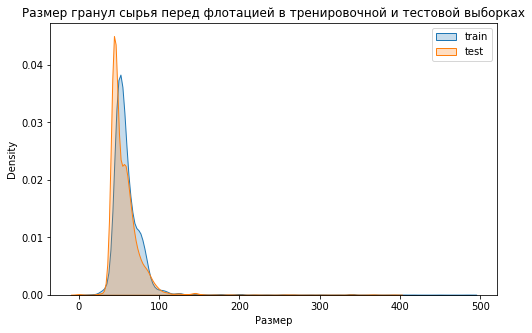

In [18]:
plt.figure(figsize = (8,5))

sns.kdeplot(df_train['rougher.input.feed_size'], fill = True, label = 'train')
sns.kdeplot(df_test['rougher.input.feed_size'], fill = True, label = 'test')

plt.title('Размер гранул сырья перед флотацией в тренировочной и тестовой выборках')
plt.xlabel('Размер')

plt.legend()
plt.show()

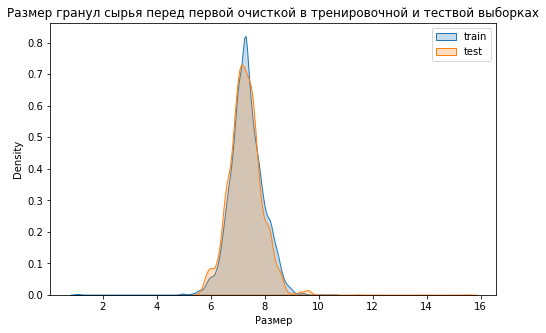

In [19]:
plt.figure(figsize = (8,5))

sns.kdeplot(df_train['primary_cleaner.input.feed_size'], fill = True, label = 'train')
sns.kdeplot(df_test['primary_cleaner.input.feed_size'], fill = True, label = 'test')

plt.title('Размер гранул сырья перед первой очисткой в тренировочной и тествой выборках')
plt.xlabel('Размер')

plt.legend()
plt.show()

Судя по графикам, распределение размеров гранул сырья в обучающей и тестовой выборках не сильно отличаются друг от друга.

Исследуем суммарную концентрацию всех веществ (серебро, золото, свинец и коллоидный раствор) на разных стадиях: в сырье(rougher.input), в черновом(rougher.output) и финальном концентратах(final). Для этого добавим новые столбцы и построим гистограммы по этим столбцам.

In [20]:
df_full['rougher_input_feed_sum'] = (df_full['rougher.input.feed_ag'] + 
                                     df_full['rougher.input.feed_pb'] + 
                                     df_full['rougher.input.feed_sol'] + 
                                     df_full['rougher.input.feed_au'])

df_full['rougher_output_concentrate_sum'] = (df_full['rougher.output.concentrate_ag'] + 
                                     df_full['rougher.output.concentrate_pb'] + 
                                     df_full['rougher.output.concentrate_sol'] + 
                                     df_full['rougher.output.concentrate_au'])

df_full['final_output_concentrate_sum'] = (df_full['final.output.concentrate_ag'] + 
                                     df_full['final.output.concentrate_pb'] + 
                                     df_full['final.output.concentrate_sol'] + 
                                     df_full['final.output.concentrate_au'])

df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher_input_feed_sum,rougher_output_concentrate_sum,final_output_concentrate_sum
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,51.061546,65.752751,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,47.859163,65.908382,64.004667


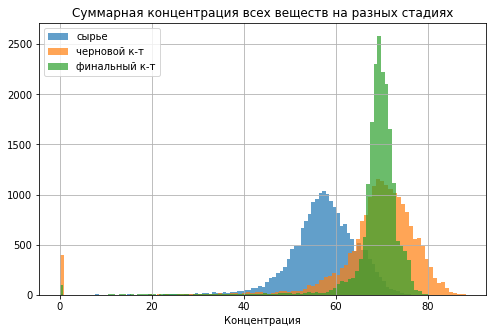

In [21]:
df_full['rougher_input_feed_sum'].hist(bins=100, alpha = 0.7, label='сырье', figsize=(8,5))
df_full['rougher_output_concentrate_sum'].hist(bins=100, alpha = 0.7, label='черновой к-т', figsize=(8,5))
df_full['final_output_concentrate_sum'].hist(bins=100, alpha = 0.7, label='финальный к-т', figsize=(8,5))

plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.xlabel('Концентрация')

plt.legend()
plt.show()

Общая концентрация всех веществ в сырье самая низкая с невысокой частотой повторения. А вот после флотации концентрация увеличилась, а вот частота, с которой встречаются такие концентрации осталась неизменной.

В финальном концентрате содержание всех веществ осталось примерно на том же уровне, а частота, с которой встречаются такие показатели заметно выросла - почти в два раза.

Но на графике есть аномалии - нулевое значение суммы веществ. Удалим строки с этими аномалиями из тренировочной выборки.

In [22]:
df_train = df_train[((df_train['rougher.output.concentrate_ag'] + 
                     df_train['rougher.output.concentrate_pb'] + 
                     df_train['rougher.output.concentrate_sol'] + 
                     df_train['rougher.output.concentrate_au']) != 0)|
                   ((df_train['final.output.concentrate_ag'] + 
                    df_train['final.output.concentrate_pb'] + 
                    df_train['final.output.concentrate_sol'] + 
                    df_train['final.output.concentrate_au']) != 0)]
df_train.shape

(14148, 87)

## Модель

Начнем построение модели. Для начала напишем функцию для вычисления итоговой sMAPE.

In [24]:
def my_smape_total(smape_rougher, smape_final):
    
    total_smape = 0.25 * smape_rougher + 0.75 * smape_final
    
    return total_smape

In [25]:
#также напишем функцию для расчета sMAPE для каждого таргета
def my_smape(predict, target):
    
    smape = (sum(abs(target - predict) / 
                          ((abs(target) + abs(predict))/2 + 0.00001)) / len(target))* 100
    return smape              

Итак, наши целевые признаки rougher.output.recovery и final.output.recovery. Это количественные признаки, задача регрессии. Для их предсказания мы построим две модели - линейной регрессии и случайного леса.

In [26]:
#Для обучения мы используем только признаки, которые есть в тестовой выборке, 
#поскольку они известны на момент начала процесса и прогнозирования
train = df_train[df_test.columns]

features_train = train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_r = df_train['rougher.output.recovery']
target_train_f = df_train['final.output.recovery']

smape_scorer = make_scorer(my_smape, greater_is_better = False)

In [27]:
#стандартизруем признаки
scaler = StandardScaler()
scaler.fit(features_train)

features_train_scaled = scaler.transform(features_train)

In [28]:
#модель лин.регрессии

model_LR = LinearRegression()

scores_LR_rougher = cross_val_score(model_LR, features_train, target_train_r, scoring = smape_scorer)
scores_LR_final = cross_val_score(model_LR, features_train, target_train_f, scoring = smape_scorer)

smape_LR_rougher = sum(scores_LR_rougher) * (-1) / len(scores_LR_rougher)
smape_LR_final = sum(scores_LR_final) * (-1) / len(scores_LR_final)

print('Средняя оценка качества модели лин.регрессии для предсказания rougher.output.recovery:', smape_LR_rougher)
print('Средняя оценка качества модели лин.регрессии для предсказания final.output.recovery::', smape_LR_final)
print('Итоговая sMAPE линейной модели', my_smape_total(smape_LR_rougher, smape_LR_final))

Средняя оценка качества модели лин.регрессии для предсказания rougher.output.recovery: 12.771700994104567
Средняя оценка качества модели лин.регрессии для предсказания final.output.recovery:: 12.20207286597872
Итоговая sMAPE линейной модели 12.344479898010182


12% отклонения. Посмотрим другую модель.

In [33]:
#сначала подберем параметры
model_RF = RandomForestRegressor(random_state=12345)

params_RF = {'max_depth': [x for x in range(5, 10, 2)],
           'n_estimators': [x for x in range(50, 100, 20)]
           }

grid_RF_rougher = GridSearchCV(model_RF, params_RF, scoring = smape_scorer, n_jobs=-1)

grid_RF_final = GridSearchCV(model_RF, params_RF, scoring = smape_scorer, n_jobs=-1)


grid_RF_rougher.fit(features_train, target_train_r)
grid_RF_final.fit(features_train, target_train_f)

print(grid_RF_rougher.best_params_)
print(round(abs(grid_RF_rougher.best_score_), 3))
print(grid_RF_final.best_params_)
print(round(abs(grid_RF_final.best_score_), 3))

{'max_depth': 5, 'n_estimators': 140}
10.958
{'max_depth': 5, 'n_estimators': 80}
10.15


In [29]:
#теперь обучим модель на оптимальных параметрах и проведем кросс-валидацию
best_model_RF = RandomForestRegressor(max_depth=5, n_estimators=90, random_state=12345)

scores_RF_rougher = cross_val_score(best_model_RF, features_train, target_train_r, scoring = smape_scorer)
scores_RF_final = cross_val_score(best_model_RF, features_train, target_train_f, scoring = smape_scorer)

smape_RF_rougher = sum(scores_RF_rougher) * (-1) / len(scores_RF_rougher)
smape_RF_final = sum(scores_RF_final) * (-1) / len(scores_RF_final)

print('Средняя оценка качества модели случайного леса для предсказания rougher.output.recovery:', smape_RF_rougher)
print('Средняя оценка качества модели случайного леса для предсказания final.output.recovery::', smape_RF_final)
print('Итоговая sMAPE модели случайного леса', my_smape_total(smape_RF_rougher, smape_RF_final))

Средняя оценка качества модели случайного леса для предсказания rougher.output.recovery: 10.983149518952974
Средняя оценка качества модели случайного леса для предсказания final.output.recovery:: 10.161971760205002
Итоговая sMAPE модели случайного леса 10.367266199891995


Здесь итоговая sMAPE меньше почти на 2% поэтому выберем модель случайного леса.

In [30]:
#теперь проверим выбранную модель на тестовой выборке

features_test = df_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_r = df_test['rougher.output.recovery']
target_test_f = df_test['final.output.recovery']

best_model_RF.fit(features_train, target_train_r)
predictions_test_r = best_model_RF.predict(features_test)
smape_rougher_test = my_smape(predictions_test_r, target_test_r)

best_model_RF.fit(features_train, target_train_f)
predictions_test_f = best_model_RF.predict(features_test)
smape_final_test = my_smape(predictions_test_f, target_test_f)

print('Итоговая sMAPE выбранной модели на тестовой выборке', my_smape_total(smape_rougher_test, smape_final_test))

Итоговая sMAPE выбранной модели на тестовой выборке 9.774691523452585


Итоговая sMAPE на тестовой выборке получилась даже меньше, чем на тренировочной. Ошибка предсказаний модели составила 9.8% от фактического значения. Наша модель прошла проверку на тестовых данных. Теперь сравним её с константной моделью.

In [32]:
model_dummy = DummyRegressor(strategy="median")

model_dummy.fit(features_train, target_train_r)
predictions_dummy_r = model_dummy.predict(features_test)
smape_rougher_dummy = my_smape(predictions_dummy_r, target_test_r)

model_dummy.fit(features_train, target_train_f)
predictions_dummy_f = model_dummy.predict(features_test)
smape_final_dummy = my_smape(predictions_dummy_f, target_test_f)

print('Итоговая sMAPE константной модели на тестовой выборке', my_smape_total(smape_rougher_dummy, smape_final_dummy))

Итоговая sMAPE константной модели на тестовой выборке 9.479687630415167


На константной модели итоговая ошибка предсказания тестовой выборки меньше - 9.5%.

**ВЫВОД:** Итак, для лучшего прогнозирования эффективности обогащения чернового концентрата rougher.output.recovery и эффективности обогащения финального концентрата final.output.recovery рекомендуем использовать модель RandomForestRegressor с оптимальными параметрами max_depth=5, n_estimators=90, random_state=12345.